## Ejercicio para tus Alumnos: Regresión y Clasificación con el Dataset de Bike Sharing

### Instrucciones Generales
- Descarga el dataset de Bike Sharing de la UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)
- Explora y prepara los datos
- Desarrolla un modelo de regresión para predecir el número de alquileres
- Desarrolla un modelo de clasificación para predecir categorías de demanda
- Evalúa y compara ambos modelos

### Ejercicio de Regresión

#### Carga y exploración inicial de datos
1. Cargar el dataset
2. Explorar la estructura de los datos (shape, info, describe)
3. Visualizar la distribución de alquileres de bicicletas
4. Analizar correlaciones entre variables
#### Preprocesamiento de datos
5. Manejar valores nulos si existen
6. Codificar variables categóricas (día de la semana, temporada, etc.)
7. Normalizar variables numéricas
8. Dividir en conjuntos de entrenamiento y prueba
#### Construcción del modelo de regresión
9. Diseñar la arquitectura de la red neuronal
10. Configurar hiperparámetros iniciales
11. Compilar el modelo usando la función de pérdida adecuada para regresión (MSE)
12. Implementar callbacks (EarlyStopping, ReduceLROnPlateau)
#### Entrenamiento y evaluación
13. Entrenar el modelo
14. Visualizar las curvas de aprendizaje
15. Evaluar en el conjunto de prueba (MSE, MAE, R²)
16. Visualizar predicciones vs valores reales
#### Optimización
17. Ajustar hiperparámetros (tasa de aprendizaje, arquitectura, etc.)
18. Probar diferentes combinaciones de características
19. Implementar regularización si es necesario
20. Pasos Detallados para el Ejercicio de Clasificación


### Problema de Clasificación
1. Crear categorías basadas en el número de alquileres (por ejemplo, 'baja', 'media', 'alta')
2. Visualizar la distribución de las clases
#### Preparación de datos para clasificación
3. Codificar la variable objetivo (one-hot encoding)
4. Asegurar balance de clases o implementar técnicas para manejar desbalance
#### Construcción del modelo de clasificación
5. Diseñar la arquitectura de la red neuronal (similar a la de regresión pero con ajustes)
6. Usar activación softmax en la capa de salida
7. Compilar con función de pérdida categorical_crossentropy
8. Añadir métricas de clasificación (accuracy, precision, recall)
#### Entrenamiento y evaluación
9. Entrenar el modelo de clasificación
10. Visualizar la matriz de confusión
11. Calcular métricas por clase (precision, recall, F1-score)
12. Generar curva ROC para problemas multiclase
#### Optimización y comparación
13. Ajustar hiperparámetros
14. Comparar con otros algoritmos de clasificación
15. Evaluar importancia de características


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CARGA Y EXPLORACIÓN DE DATOS

## 1.1. Cargar el Dataset

In [9]:
hour = pd.read_csv("hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 1.2. Explorar la estructura de los datos (shape, info, describe)

In [10]:
hour.shape

(17379, 17)

In [11]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## 1.3. Visualizar la distribución de alquileres de bicicletas

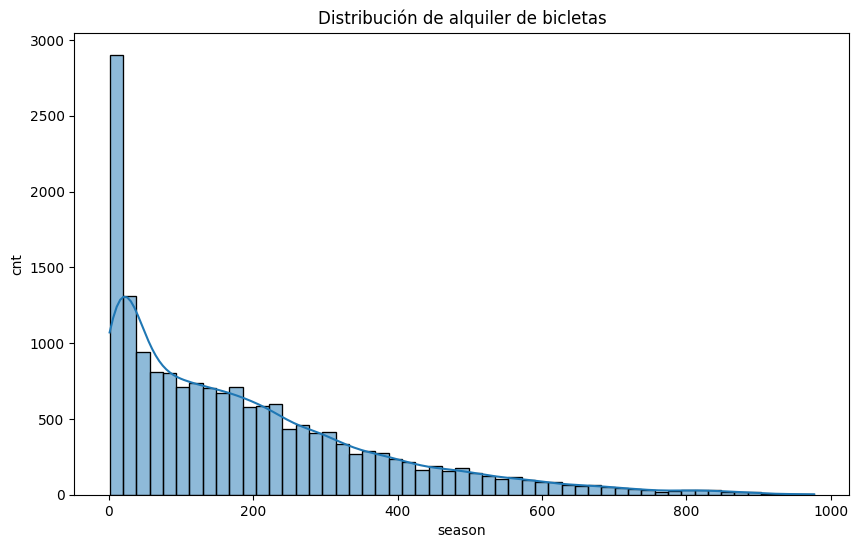

In [13]:
# Visualización de la distribución de precios
plt.figure(figsize=(10,6))
sns.histplot(hour['cnt'], kde=True);
plt.title('Distribución de alquiler de bicletas')
plt.xlabel('season')
plt.ylabel('cnt');